In [16]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression  
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier  
from sklearn import metrics

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
knn=KNeighborsClassifier(n_neighbors=2)
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt



In [17]:
df = pd.read_csv('/media/reindrairawan/New Volume/Data E/REPOSITORY/PYTHON/ProjectKuliah/NLP/ProjectUas(Sentimen_Analisis)/modelSentimen/hasilsentimenindonesia.csv')
df.columns = df.columns.str.replace('Unnamed: 0', 'text')

df


,text,neg,neu,pos,compound,comp_score
0,gue suprise sih citayam fashion week issuenya ...,0.000,1.000,0.000,0.0000,neu
1,rt thefirstxxviii nahh pdhal dri kagak tuh bik...,0.000,1.000,0.000,0.0000,neu
2,rt valosenadya ayo dng jujur yg citayam fashio...,0.000,1.000,0.000,0.0000,neu
3,rt suckerzpunch nih rapper ga laku dalem hati ...,0.000,1.000,0.000,0.0000,neu
4,nasi citayam fashion week videodreamcoid video...,0.000,1.000,0.000,0.0000,neu
...,...,...,...,...,...,...
1445,ga yg salah dgn scbd citayam fashion week kump...,0.000,0.950,0.050,0.2263,pos
1446,the trend called citayam fashion week in scbd ...,0.000,1.000,0.000,0.0000,neu
1447,rt vivacoid kawasan dukuh penuh remaja gelar j...,0.000,1.000,0.000,0.0000,neu
1448,kata sih scbd fashion week keren jg gk tuju ny...,0.000,1.000,0.000,0.0000,neu


In [18]:
df['comp_score'] = enc.fit_transform(df['comp_score'].values)
df['text'] = enc.fit_transform(df['text'].values)

In [19]:
datax = df.drop(columns='comp_score')
datay = df['comp_score']
datax

,text,neg,neu,pos,compound
0,436,0.000,1.000,0.000,0.0000
1,1125,0.000,1.000,0.000,0.0000
2,1138,0.000,1.000,0.000,0.0000
3,1112,0.000,1.000,0.000,0.0000
4,752,0.000,1.000,0.000,0.0000
...,...,...,...,...,...
1445,380,0.000,0.950,0.050,0.2263
1446,1318,0.000,1.000,0.000,0.0000
1447,1145,0.000,1.000,0.000,0.0000
1448,589,0.000,1.000,0.000,0.0000


In [20]:


x_train, x_test, y_train, y_test = train_test_split(datax, datay, test_size=0.20, random_state=50)
knn.fit(datax, datay)

KNeighborsClassifier(n_neighbors=2)

0.9379310344827586
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       0.94      1.00      0.97       256
           2       1.00      0.29      0.45        24

    accuracy                           0.94       290
   macro avg       0.95      0.76      0.79       290
weighted avg       0.94      0.94      0.92       290

Akurasi:  0.9379310344827586


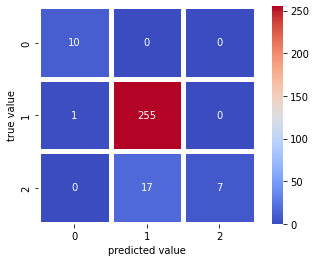

In [21]:

pred = knn.predict(x_test)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))
print('Akurasi: ', knn.score(x_test, y_test))

mat = confusion_matrix(y_test, pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=True, cmap='coolwarm', linewidths=5)
plt.xlabel('predicted value')
plt.ylabel('true value')
plt.show()